In [1]:
from base import np, h5py

import importlib
import threeD
importlib.reload(threeD)
from threeD import FluxMap3D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/FluxMap3D/"

# Generalising Step Concentrations

Concentration profile described by a spherical shell with inner radii ($\rho$) and thicknesses ($\lambda$), with the restriction $\rho + \lambda \leq L$.

$$
c_{\text{shell}}(r; \rho,\lambda) = 
\begin{cases} 
\frac{3}{4 \pi} \frac{1}{\lambda^3 + 3 \lambda^2 \rho + 3 \lambda \rho^2} & \text{if } \rho \leq r \leq \rho + \lambda, \\
0 & \text{otherwise}.
\end{cases}
$$

Parameters range:
$$
\rho \in [R_D, L - \lambda] \quad \text{\&} \quad \lambda \in [0, L - R_D]
$$

In [2]:
def shell_generator(rho, lambda_):
    'Define the inner step function that takes r as parameter'
    def c_shell(r):
        'Determine the condition based on rho and lambda_'
        cond = (r >= rho) & (r <= rho + lambda_)
        c = 3/(4*np.pi) * 1/(lambda_**3 + 3 * lambda_**2 * rho + 3 * lambda_ * rho**2)
        # Return c where cond == True, else 0
        return np.where(cond , c , 0)
    return c_shell

syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 1000,
    # Local Boundary
    'L' : 10,
    'alpha': None,
    # Spatial Grid Points
    'nr': 1_000_000, # Weird triangles appear if it's too low
    'n_rho': 250,'n_lambda': 250
}
SOLVE_SYSTEM = False

### Flux-Maps: $R_D = 1, \; \& \; L = 10$ 📄

Tc/Td = 2.5133 -> Abs. ~ Dom.


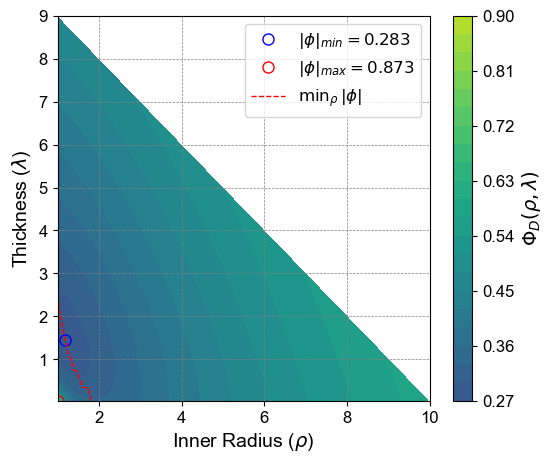

In [3]:
syst_params['alpha'] = 1e2

FM2 = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM2.solve(n_jobs=-1)
    FM2.save_data('c_shell(r)_L=10_alpha=1e2')
else:
    FM2.load_data('c_shell(r)_L=10_alpha=1e2')
FM2.plot(set_extremes=True, set_transition=True)
FM2.save(figures_path, 'c_shell(r)_L=10_alpha=1e2')
print(f'Tc/Td = {FM2.T_ratio:.4f} -> Abs. ~ Dom.')

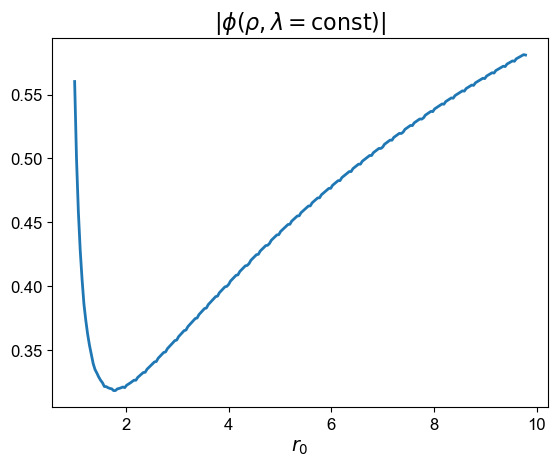

In [ ]:
import matplotlib.pyplot as plt
plt.plot(FM2.x_values, FM2.flux_map[:,5])
plt.xlabel('$\rho$')
plt.title('$|\\phi(\\rho, \\lambda=\\text{const})|$');

Tc/Td = 25.1327 -> Diff. Dom.


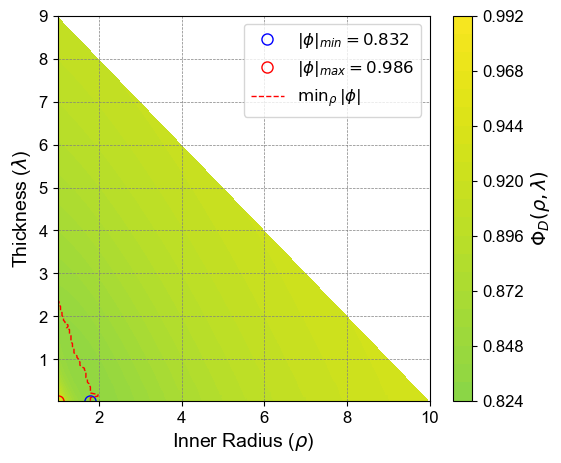

In [4]:
syst_params['alpha'] = 1e1

FM1 = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM1.solve(n_jobs=-1)
    FM1.save_data('c_shell(r)_L=10_alpha=1e1')
else:
    FM1.load_data('c_shell(r)_L=10_alpha=1e1')
FM1.plot(set_extremes=True, set_transition=True)
FM1.save(figures_path, 'c_shell(r)_L=10_alpha=1e1')
print(f'Tc/Td = {FM1.T_ratio:.4f} -> Diff. Dom.')

In [ ]:
# syst_params['alpha'] = 1e0

# FM0 = FluxMap3D(syst_params, shell_generator)
# if SOLVE_SYSTEM:
#     FM0.solve(n_jobs=-1)
#     FM0.save_data('c_shell(r)_L=10_alpha=1e0')
# else:
#     FM0.load_data('c_shell(r)_L=10_alpha=1e0')
# FM0.plot(set_extremes=True, set_transition=False)
# FM0.save(figures_path, 'c_shell(r)_L=10_alpha=1e0')
# print(f'Tc/Td = {FM0.T_ratio:.4f} -> Diff. Dom.')

In [1]:
# syst_params['alpha'] = 1e3

# FM3 = FluxMap3D(syst_params, shell_generator)
# if SOLVE_SYSTEM:
#     FM3.solve(n_jobs=-1)
#     FM3.save_data('c_shell(r)_L=10_alpha=1e3')
# else:
#     FM3.load_data('c_shell(r)_L=10_alpha=1e3')
# FM3.plot(set_extremes=True, set_transition=False)
# FM3.save(figures_path, 'c_shell(r)_L=10_alpha=1e3')
# print(f'Tc/Td = {FM3.T_ratio:.4f} -> Abs. Dom.')

### Zoom: $R_D = 1, \; \& \; L = 3$ 📄

In [32]:
syst_params['L'] = 3

Tc/Td = 0.7540


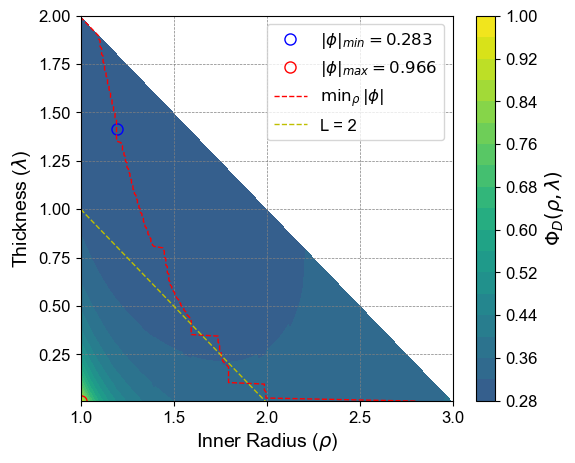

In [37]:
syst_params['alpha'] = 1e2

FM2z = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM2z.solve(n_jobs=-1)
    FM2z.save_data('c_shell(r)_L=3_alpha=1e2')
else:
    FM2z.load_data('c_shell(r)_L=3_alpha=1e2')
FM2z.plot(set_extremes=True, set_transition=True)
Lz = 2
x = FM2z.x_values[FM2z.x_values < Lz]
y = - x + Lz
FM2z.ax.plot(x, y, 'y--', linewidth=1, label=f'L = {Lz}')
FM2z.ax.legend()
FM2z.ax.set_ylim(0.01, 2)
FM2z.save(figures_path, 'c_shell(r)_L=3_alpha=1e2')
print(f'Tc/Td = {FM2z.T_ratio:.4f}')

Tc/Td = 7.5398


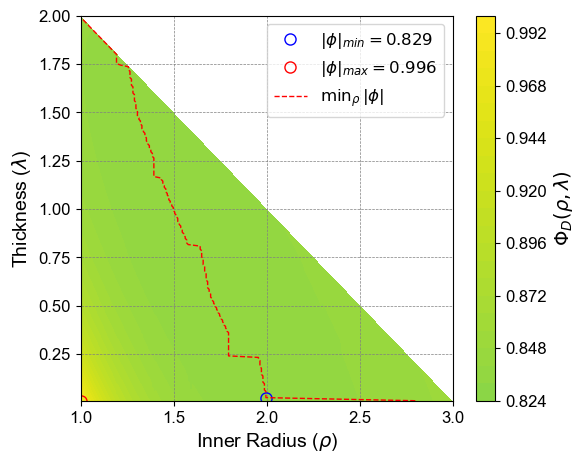

In [35]:
syst_params['alpha'] = 1e1

FM1z = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM1z.solve(n_jobs=-1)
    FM1z.save_data('c_shell(r)_L=3_alpha=1e1')
else:
    FM1z.load_data('c_shell(r)_L=3_alpha=1e1')
FM1z.plot(set_extremes=True, set_transition=True)
FM1z.save(figures_path, 'c_shell(r)_L=3_alpha=1e1')
print(f'Tc/Td = {FM1z.T_ratio:.4f}')

### Less Interesting Flux-Maps: $\alpha = 1, \, 10^3$

Tc/Td = 0.0754


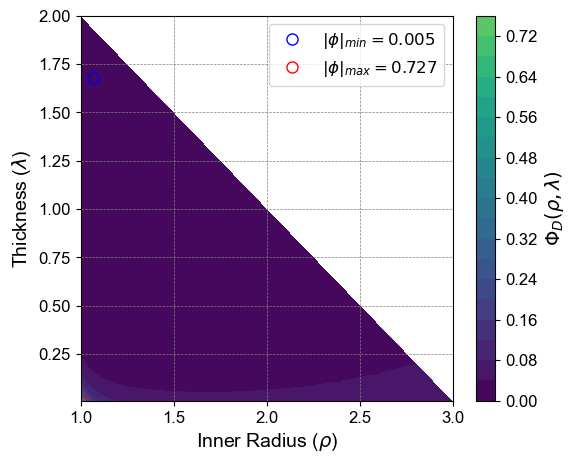

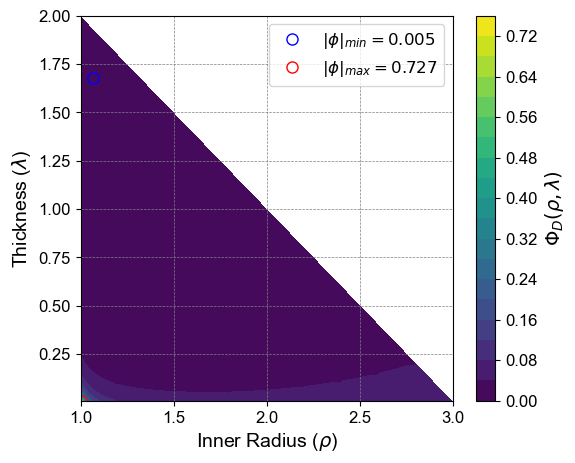

In [10]:
syst_params['alpha'] = 1e3

FM3z = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM3z.solve(n_jobs=-1)
    FM3z.save_data('c_shell(r)_L=3_alpha=1e3')
else:
    FM3z.load_data('c_shell(r)_L=3_alpha=1e3')
FM3z.plot(set_extremes=True, set_transition=False)
FM3z.plot(flux_range=False, set_extremes=True, set_transition=False)
# FM3z.save(figures_path, 'c_shell(r)_L=3_alpha=1e3')
print(f'Tc/Td = {FM3z.T_ratio:.4f}')

Tc/Td = 251.3274


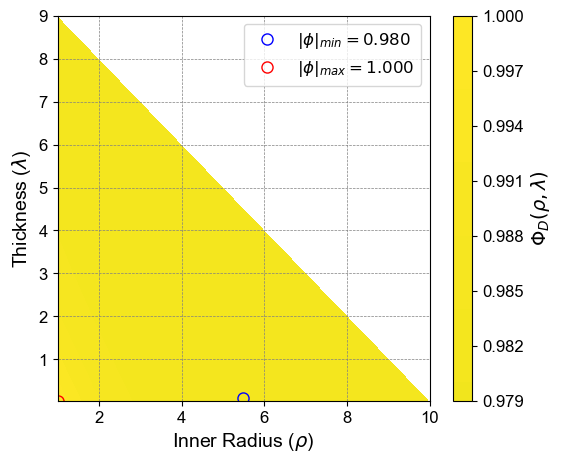

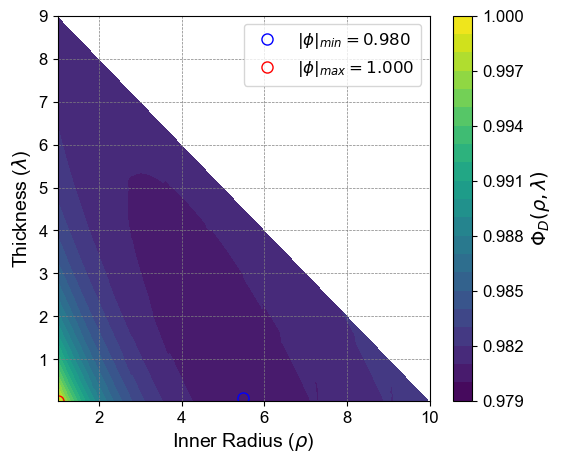

In [8]:
syst_params['alpha'] = 1e0

FM0z = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM0z.solve(n_jobs=-1)
    FM0z.save_data('c_shell(r)_L=3_alpha=1e0')
else:
    FM0z.load_data('c_shell(r)_L=3_alpha=1e0')
FM0z.plot(set_extremes=True, set_transition=False)
FM0z.plot(flux_range=False, set_extremes=True, set_transition=False)
# FM0z.save(figures_path, 'c_shell(r)_L=3_alpha=1e0')
print(f'Tc/Td = {FM0z.T_ratio:.4f}')